<a href="https://colab.research.google.com/github/liezliez/Signal-Data-Filtering-IoT/blob/main/Signal_Data_Filtering_MVA_LPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Header

In [70]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz

#Pembacaan File .csv

In [4]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['13.csv'].decode('utf-8')))

Saving 13.csv to 13.csv


#Deklarasi data

In [55]:
#Assign dataset ke masing-masing kolom/variabel A,B,C

A = df.iloc[:, 0] #index
B = df.iloc[:, 1] #sumbu X
C = df.iloc[:, 2] #sumbu Y
D = df.iloc[:, 3] #sumbu Z

#karena datanya banyak, saya ambil 1000 data saja
B_1000 = B[1 : 1000]
C_1000 = C[1 : 1000]

D_1000 = D[1 : 1000]

#MVA FILTER

In [64]:
#Mengembalikan MVA dari dataset
def MVA_Filter(data,window_size):
  hasil = data.rolling(window=window_size).mean()
  return hasil

Untuk Kolom B

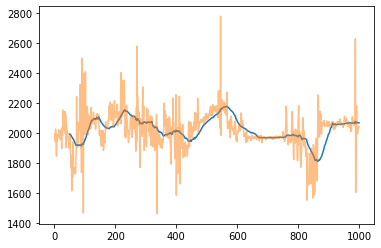

In [66]:
MVA_Filter(B_1000,50).plot(label ='MVA')
plt.plot(B_1000, label='B', alpha = 0.5)
MVA_B = MVA_Filter(B_1000,50)

Untuk Kolom C

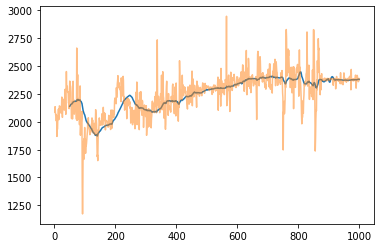

In [67]:
MVA_Filter(C_1000,50).plot(label ='MVA')
plt.plot(C_1000, label='C', alpha = 0.5)
MVA_C = C_1000.rolling(window=50).mean()

Untuki Kolom D

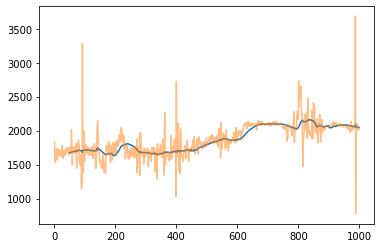

In [68]:
MVA_Filter(D_1000,50).plot(label ='MVA')
plt.plot(D_1000, label='D', alpha = 0.5)
MVA_D = D_1000.rolling(window=50).mean()

#LPF FILTER

In [93]:
# https://stackoverflow.com/questions/25191620/

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 30.0   # sample rate, per data
cutoff = 3.667  # cutoff frequency yang diinginkan dari filter

# ambil koefisiensi filter.
b, a = butter_lowpass(cutoff, fs, order)


Untuk Kolom B

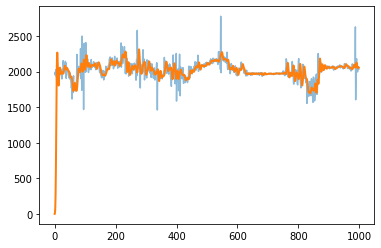

In [94]:
y = butter_lowpass_filter(B_1000, cutoff, fs, order)
plt.plot(B_1000, label='B', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')

Untuk Kolom C

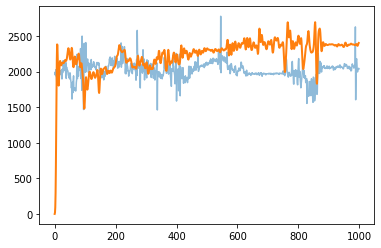

In [95]:
y = butter_lowpass_filter(C_1000, cutoff, fs, order)
plt.plot(B_1000, label='C', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')

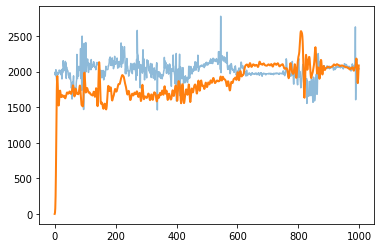

In [96]:
y = butter_lowpass_filter(D_1000, cutoff, fs, order)
plt.plot(B_1000, label='D', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')